## Procesamiento y analisis estadistico

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/2/query?where=1%3D1&outFields=*&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")

Datos obtenidos exitosamente


In [3]:
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

In [4]:
accidentes_data = pd.DataFrame(rows)
accidentes_data.head(5)

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,473089,A001510479,10578026.0,1659848400000,18:06:00,2022.0,AGOSTO,DOMINGO,KR 22 - CL 36 S 02,CON HERIDOS,CHOQUE,RAFAEL URIBE URIBE,BOGOTA DC,1659913560000,4.579,-74.118,18001230.0,NaN
1,473090,A001514341,10581571.0,1663909200000,06:40:00,2022.0,SEPTIEMBRE,VIERNES,KR 86 - CL 90 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,1663933200000,4.710,-74.094,10003082.0,NaN
2,473091,A001513562,10580724.0,1663218000000,07:00:00,2022.0,SEPTIEMBRE,JUEVES,KR 86 - CL 26 02,CON HERIDOS,CHOQUE,FONTIBON,BOGOTA DC,1663243200000,4.679,-74.120,9004423.0,NaN
3,473092,A001513324,10579997.0,1662181200000,09:08:00,2022.0,SEPTIEMBRE,SABADO,KR 104 - CL 72 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,1662214080000,4.706,-74.119,10004039.0,NaN
4,473093,A001513358,10580407.0,1662613200000,22:10:00,2022.0,SEPTIEMBRE,JUEVES,KR 110 - CL 71 02,CON HERIDOS,CHOQUE,ENGATIVA,BOGOTA DC,1662693000000,4.709,-74.126,10003184.0,NaN


In [5]:
accidentes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              2000 non-null   int64  
 1   FORMULARIO            2000 non-null   object 
 2   CODIGO_ACCIDENTE      2000 non-null   float64
 3   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 4   HORA_OCURRENCIA_ACC   2000 non-null   object 
 5   ANO_OCURRENCIA_ACC    2000 non-null   float64
 6   MES_OCURRENCIA_ACC    2000 non-null   object 
 7   DIA_OCURRENCIA_ACC    2000 non-null   object 
 8   DIRECCION             2000 non-null   object 
 9   GRAVEDAD              2000 non-null   object 
 10  CLASE_ACC             2000 non-null   object 
 11  LOCALIDAD             2000 non-null   object 
 12  MUNICIPIO             2000 non-null   object 
 13  FECHA_HORA_ACC        2000 non-null   int64  
 14  LATITUD               2000 non-null   float64
 15  LONGITUD             

In [6]:
accidentes_data.isna().sum()

OBJECTID                   0
FORMULARIO                 0
CODIGO_ACCIDENTE           0
FECHA_OCURRENCIA_ACC       0
HORA_OCURRENCIA_ACC        0
ANO_OCURRENCIA_ACC         0
MES_OCURRENCIA_ACC         0
DIA_OCURRENCIA_ACC         0
DIRECCION                  0
GRAVEDAD                   0
CLASE_ACC                  0
LOCALIDAD                  0
MUNICIPIO                  0
FECHA_HORA_ACC             0
LATITUD                    0
LONGITUD                   0
CIV                       37
PK_CALZADA              1584
dtype: int64

In [7]:
accidentes_data.drop(columns=['PK_CALZADA'],inplace=True) # Información que cuenta con demasiados valores nulos

In [8]:
accidentes_data.drop(columns=['CIV'],inplace=True) # Información que no es relevante para el análisis

In [9]:
accidentes_data.isna().sum()

OBJECTID                0
FORMULARIO              0
CODIGO_ACCIDENTE        0
FECHA_OCURRENCIA_ACC    0
HORA_OCURRENCIA_ACC     0
ANO_OCURRENCIA_ACC      0
MES_OCURRENCIA_ACC      0
DIA_OCURRENCIA_ACC      0
DIRECCION               0
GRAVEDAD                0
CLASE_ACC               0
LOCALIDAD               0
MUNICIPIO               0
FECHA_HORA_ACC          0
LATITUD                 0
LONGITUD                0
dtype: int64

In [10]:
# Reemplazar cadenas vacías o espacios con NaN
accidentes_data.replace(["", " ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
accidentes_data.dropna(inplace=True)

In [11]:
accidentes_data.dropna()
accidentes_data.info()
# Obtenemos finalmente una tabla sin valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              2000 non-null   int64  
 1   FORMULARIO            2000 non-null   object 
 2   CODIGO_ACCIDENTE      2000 non-null   float64
 3   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 4   HORA_OCURRENCIA_ACC   2000 non-null   object 
 5   ANO_OCURRENCIA_ACC    2000 non-null   float64
 6   MES_OCURRENCIA_ACC    2000 non-null   object 
 7   DIA_OCURRENCIA_ACC    2000 non-null   object 
 8   DIRECCION             2000 non-null   object 
 9   GRAVEDAD              2000 non-null   object 
 10  CLASE_ACC             2000 non-null   object 
 11  LOCALIDAD             2000 non-null   object 
 12  MUNICIPIO             2000 non-null   object 
 13  FECHA_HORA_ACC        2000 non-null   int64  
 14  LATITUD               2000 non-null   float64
 15  LONGITUD             

In [12]:
accidentes_data['MUNICIPIO'].value_counts()
accidentes_data.drop(columns=['MUNICIPIO'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá

In [13]:
accidentes_data.drop(columns=['OBJECTID','FECHA_HORA_ACC'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá
accidentes_data.head(5)

,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A001510479,10578026.0,1659848400000,18:06:00,2022.0,AGOSTO,DOMINGO,KR 22 - CL 36 S 02,CON HERIDOS,CHOQUE,RAFAEL URIBE URIBE,4.579,-74.118
1,A001514341,10581571.0,1663909200000,06:40:00,2022.0,SEPTIEMBRE,VIERNES,KR 86 - CL 90 02,SOLO DANOS,CHOQUE,ENGATIVA,4.710,-74.094
2,A001513562,10580724.0,1663218000000,07:00:00,2022.0,SEPTIEMBRE,JUEVES,KR 86 - CL 26 02,CON HERIDOS,CHOQUE,FONTIBON,4.679,-74.120
3,A001513324,10579997.0,1662181200000,09:08:00,2022.0,SEPTIEMBRE,SABADO,KR 104 - CL 72 02,SOLO DANOS,CHOQUE,ENGATIVA,4.706,-74.119
4,A001513358,10580407.0,1662613200000,22:10:00,2022.0,SEPTIEMBRE,JUEVES,KR 110 - CL 71 02,CON HERIDOS,CHOQUE,ENGATIVA,4.709,-74.126


In [14]:
accidentes_data['CLASE_ACC'].value_counts()

CLASE_ACC
CHOQUE               1456
ATROPELLO             378
CAIDA DE OCUPANTE      90
VOLCAMIENTO            51
OTRO                   25
Name: count, dtype: int64

In [15]:
accidentes_data['GRAVEDAD'].value_counts()

GRAVEDAD
CON HERIDOS    1647
SOLO DANOS      286
CON MUERTOS      67
Name: count, dtype: int64

array([[<Axes: title={'center': 'CODIGO_ACCIDENTE'}>,
        <Axes: title={'center': 'FECHA_OCURRENCIA_ACC'}>],
       [<Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>,
        <Axes: title={'center': 'LATITUD'}>],
       [<Axes: title={'center': 'LONGITUD'}>, <Axes: >]], dtype=object)

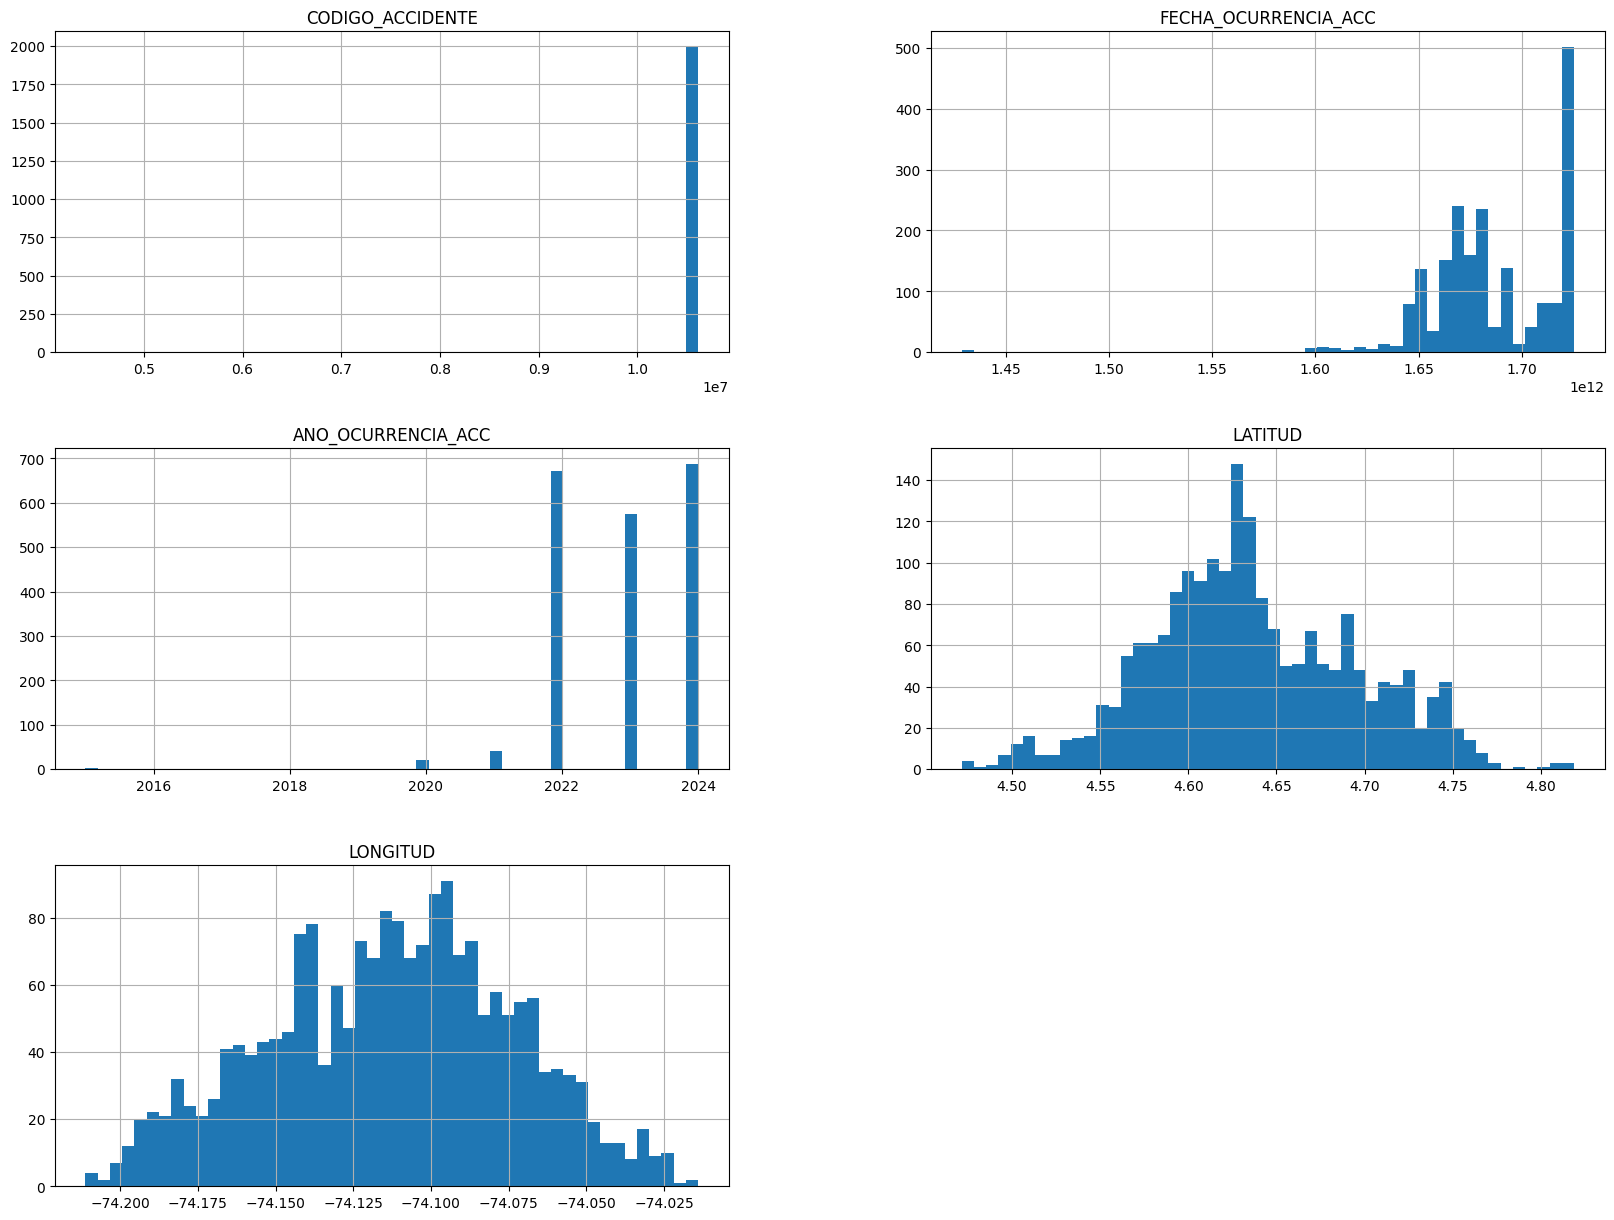

In [16]:
accidentes_data.hist(bins=50, figsize=(20,15)) #Plots a histogram of the numerical attributes
# Importante. Graficar aquellos que tienen sentido análizar en un histograma

array([[<Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>]], dtype=object)

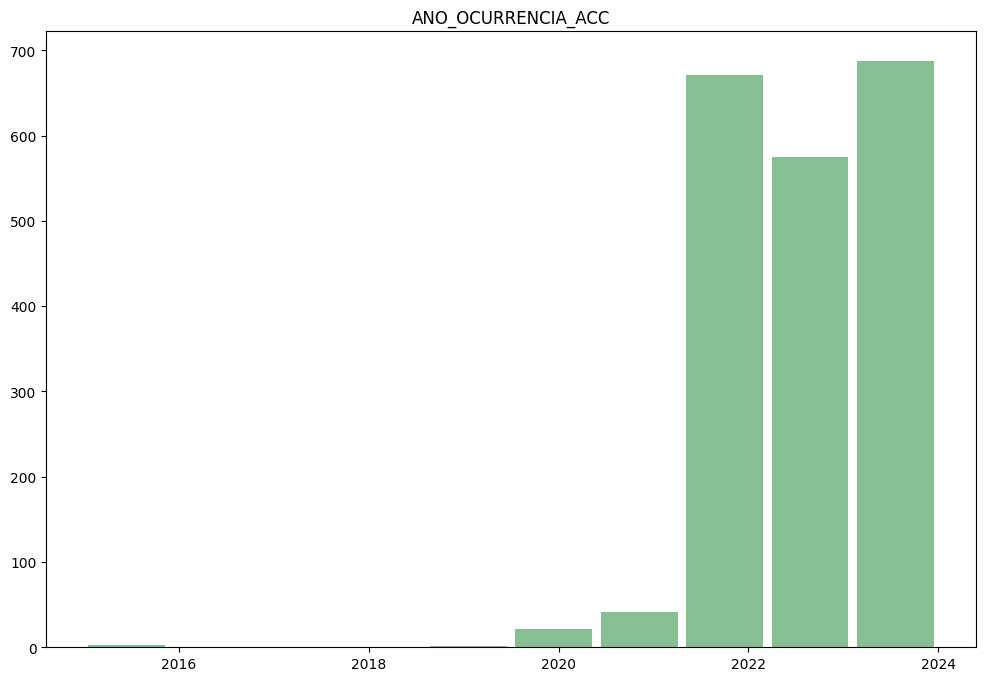

In [17]:
accidentes_data.hist(column='ANO_OCURRENCIA_ACC', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

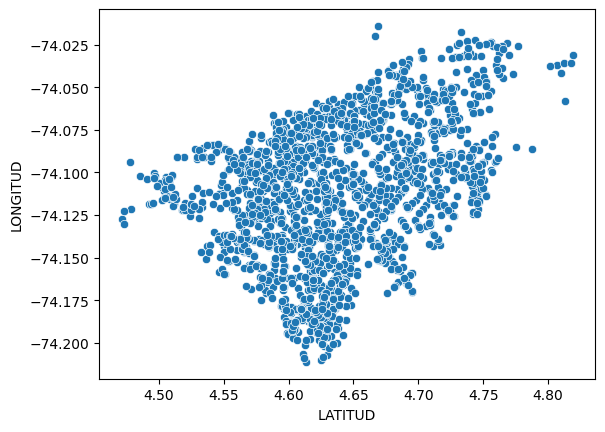

In [18]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

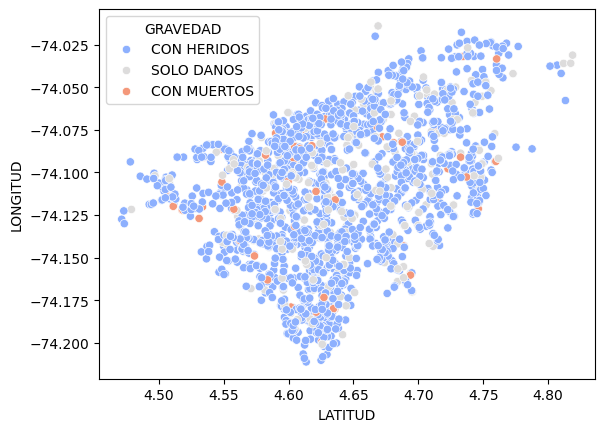

In [19]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "GRAVEDAD", palette = "coolwarm")

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

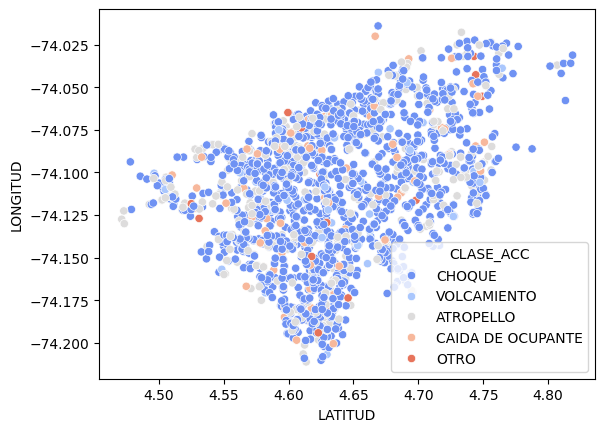

In [20]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "CLASE_ACC", palette = "coolwarm")

## Ajuste de datos

In [21]:
accidentes_data.head(5)

,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A001510479,10578026.0,1659848400000,18:06:00,2022.0,AGOSTO,DOMINGO,KR 22 - CL 36 S 02,CON HERIDOS,CHOQUE,RAFAEL URIBE URIBE,4.579,-74.118
1,A001514341,10581571.0,1663909200000,06:40:00,2022.0,SEPTIEMBRE,VIERNES,KR 86 - CL 90 02,SOLO DANOS,CHOQUE,ENGATIVA,4.710,-74.094
2,A001513562,10580724.0,1663218000000,07:00:00,2022.0,SEPTIEMBRE,JUEVES,KR 86 - CL 26 02,CON HERIDOS,CHOQUE,FONTIBON,4.679,-74.120
3,A001513324,10579997.0,1662181200000,09:08:00,2022.0,SEPTIEMBRE,SABADO,KR 104 - CL 72 02,SOLO DANOS,CHOQUE,ENGATIVA,4.706,-74.119
4,A001513358,10580407.0,1662613200000,22:10:00,2022.0,SEPTIEMBRE,JUEVES,KR 110 - CL 71 02,CON HERIDOS,CHOQUE,ENGATIVA,4.709,-74.126


In [22]:
accidentes_data['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(accidentes_data['FECHA_OCURRENCIA_ACC'], unit='ms')  # Pasamos la fecha a correcto formato datetime

# Obtener el intervalo de tiempo correcto
fecha_min = accidentes_data['FECHA_OCURRENCIA_ACC'].min().replace(day=1) #Ponemos la fecha minima como el primer dia del mes para que el intervalo de meses quede completo
fecha_max = accidentes_data['FECHA_OCURRENCIA_ACC'].max()

print(f"El intervalo de tiempo presente en el dataframe es desde {fecha_min} hasta {fecha_max}")

# Agrupar por mes y contar el número de accidentes
aux_mes = accidentes_data.groupby(accidentes_data['FECHA_OCURRENCIA_ACC'].dt.to_period('M')).size().reset_index(name='cantidad_accidentes')

# Convertir la columna de periodo a datetime (primer día del mes)
aux_mes['FECHA_OCURRENCIA_ACC'] = aux_mes['FECHA_OCURRENCIA_ACC'].dt.to_timestamp()

# Generar un rango de meses completo dentro del intervalo
rango_meses = pd.date_range(start=fecha_min, end=fecha_max, freq='MS').normalize()

# Crear un nuevo DataFrame con el rango de meses
accidentes_por_mes = pd.DataFrame({'FECHA_OCURRENCIA_ACC': rango_meses})

# Hacer un merge con los datos de accidentes y llenar los valores NaN con 0
accidentes_por_mes = accidentes_por_mes.merge(aux_mes, on='FECHA_OCURRENCIA_ACC', how='left').fillna(0)

# Convertir cantidad_accidentes a entero
accidentes_por_mes['cantidad_accidentes'] = accidentes_por_mes['cantidad_accidentes'].astype(int)

accidentes_por_mes.head(5)

El intervalo de tiempo presente en el dataframe es desde 2015-04-01 05:00:00 hasta 2024-09-04 05:00:00


,FECHA_OCURRENCIA_ACC,cantidad_accidentes
0,2015-04-01,3
1,2015-05-01,0
2,2015-06-01,0
3,2015-07-01,0
4,2015-08-01,0


In [23]:
# Ordenar el DataFrame por cantidad de accidentes en orden descendente
top_meses = accidentes_por_mes.sort_values(by='cantidad_accidentes', ascending=False)

top_meses.head(10)

,FECHA_OCURRENCIA_ACC,cantidad_accidentes
112,2024-08-01,407
92,2022-12-01,166
96,2023-04-01,105
97,2023-05-01,97
89,2022-09-01,90
100,2023-08-01,87
91,2022-11-01,81
93,2023-01-01,68
88,2022-08-01,66
85,2022-05-01,65


In [24]:
# Filtrar el DataFrame eliminando noviembre de 2024
accidentes_por_mes = accidentes_por_mes[accidentes_por_mes['FECHA_OCURRENCIA_ACC'] != '2024-11-01']


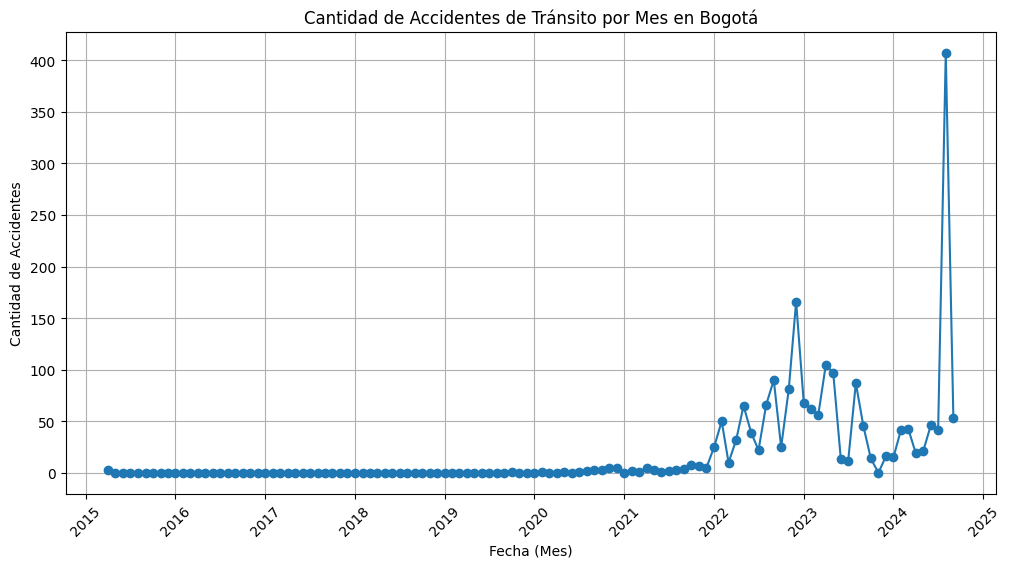

In [25]:
plt.figure(figsize=(12, 6))

# Graficar los accidentes por mes
plt.plot(accidentes_por_mes['FECHA_OCURRENCIA_ACC'], accidentes_por_mes['cantidad_accidentes'], marker='o', linestyle='-')

# Etiquetas y título
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes de Tránsito por Mes en Bogotá')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

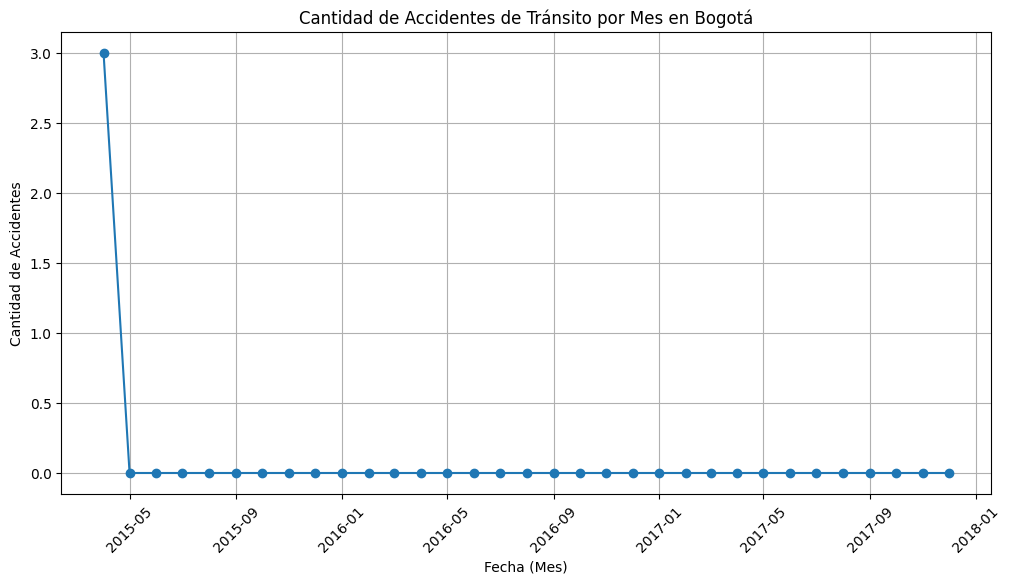

In [26]:
# Filtrar solo los registros hasta el año 2018 (inclusive)
mes_filtrado = accidentes_por_mes[accidentes_por_mes['FECHA_OCURRENCIA_ACC'].dt.year < 2018]

plt.figure(figsize=(12, 6))

# Graficar los accidentes por mes
plt.plot(mes_filtrado['FECHA_OCURRENCIA_ACC'], mes_filtrado['cantidad_accidentes'], marker='o', linestyle='-')

# Etiquetas y título
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes de Tránsito por Mes en Bogotá')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()